In [5]:
%matplotlib inline
from collections import defaultdict
from itertools import combinations
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd
import pymatgen as mg
from matminer.featurizers.composition import ElementProperty
from sklearn.model_selection import cross_val_score
sns.set(style='darkgrid')

In [2]:
df = pd.read_csv("data/train.csv")

In [5]:
df.head()

,formula,formation_energy_per_atom
0,Tb0.250000Er0.250000Np0.500000,0.863476
1,Zr0.250000Ag0.250000Re0.500000,0.670903
2,Mo0.250000Ba0.250000Th0.500000,0.701847
3,Sn0.250000Os0.250000Pa0.500000,0.057070
4,Li0.125000Fe0.125000Cu0.500000In0.250000,0.023933


In [63]:
comp = mg.Composition("Si0.250000Ga0.500000Tb0.250000")
print(comp["Si"], comp["Ga"], comp["Tb"])

print(comp.average_electroneg)
print(comp.num_atoms)
print(comp.total_electrons)
print(comp.weight)

0.25 0.5 0.25
1.6549999999999998
1.0
35.25
81.61421250000001 amu


In [70]:
#######################
### adding feature ####
#######################

df['average_electroneg'] = df.formula.apply(lambda x: mg.Composition(x).average_electroneg)
df['num_atoms'] = df.formula.apply(lambda x: mg.Composition(x).num_atoms)
df['total_electrons'] = df.formula.apply(lambda x: mg.Composition(x).total_electrons)
df['weight'] = df.formula.apply(lambda x: mg.Composition(x).weight)

# Feature and Regressor functions


In [204]:
from collections import defaultdict
import numpy as np
import re
import pymatgen as mg
from sklearn.preprocessing import MinMaxScaler, StandardScaler
 
elements = ['H', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Na', 'Mg', 'Al', 'Si', 'P', 'S', 'Cl', 'K', 'Ca', 'Sc', 'Ti', 'V', 
            'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Se', 'Br', 'Kr', 'Rb', 'Sr', 'Y', 'Zr', 'Nb', 
            'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'In', 'Sn', 'Sb', 'Te', 'I', 'Xe', 'Cs', 'Ba', 'La', 'Ce', 'Pr', 
            'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Hf', 'Ta', 'W', 'Re', 'Os', 'Ir', 
            'Pt', 'Au', 'Hg', 'Tl', 'Pb', 'Bi', 'Ac', 'Th', 'Pa', 'U', 'Np', 'Pu']
 
class FeatureExtractor:
    def __init__(self):
        pass
 
    def fit(self, X_df, y=None):
        return self
 
    def transform(self, X_df):
        formulas = X_df.formula.values
        temp_1 = np.zeros(shape=(len(formulas), len(elements)), dtype=np.float32)
        for i, formula in enumerate(formulas):
            comp = mg.Composition(formula).as_dict()
            for k in comp.keys():
                temp_1[i][elements.index(k)] = comp[k]
        #average_electroneg = X_df.formula.apply(lambda x: mg.Composition(x).average_electroneg)
        #weight = X_df.formula.apply(lambda x: mg.Composition(x).weight)
        #weight = X_df.formula.apply(lambda x: mg.Composition(x).weight)
        #weight = X_df.formula.apply(lambda x: mg.Composition(x).weight)
        
        #compositions = X_df.formula.apply(mg.Composition).values
        #feature_calculators = ElementProperty.from_preset("magpie")                 
        #X = feature_calculators.transform(compositions)
        #X = np.reshape(X, (np.shape(X)[0], np.shape(X)[1]))
        
        #final = np.concatenate((temp_1, selected), axis=1)
        
        scaler = StandardScaler() # StandardScaler()
        scaler.fit(temp_1)
        return scaler.transform(temp_1)


        return np.concatenate((temp_1, np.reshape(weight.values, (len(weight), 1)),
                               np.reshape(average_electroneg.values, (len(weight), 1)),
                               np.reshape(num_atoms.values, (len(weight), 1)),
                               np.reshape(total_electrons.values, (len(weight), 1))
                              ), axis=1)

In [198]:
from sklearn.base import BaseEstimator
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
 
class Regressor(BaseEstimator):
    def __init__(self):
        #self.reg = xgboost.XGBRegressor(n_estimators=30, learning_rate=0.01, max_depth=7)
        self.reg = MLPRegressor(activation='relu', alpha=0.05, learning_rate='adaptive', early_stopping=True,
                               
                                hidden_layer_sizes=(50,), solver='adam', max_iter=1000) # --> 0.12
        #self.reg = RandomForestRegressor(max_depth=10, n_estimators=100) # --> 0.25
 
    def fit(self, X, y):
        self.reg.fit(X, y)
 
    def predict(self, X):
        return self.reg.predict(X)

In [2]:
atom_groups = [
    ("Li", "O"),
    ("Cu", "Zn"),
    ("Cr", "Zn"),
    ("Co", "Zn"),
    ("Cu", "Ge"),
    ("Cu", "Si"),
    ("Al", "Cu"),
    ("Cu", "Mg"),
    ("Fe", "O"),
    ("Fe", "Zn"),
]

In [ ]:
    def transform(self, df):
        compositions = df.formula.apply(mg.Composition).values
        feature_calculators = ElementProperty.from_preset("magpie")                 
        X = feature_calculators.transform(compositions)
        return X

In [129]:

X = np.reshape(X, (46192, 132))

In [122]:
compositions = df.formula.apply(mg.Composition).values
feature_calculators = ElementProperty.from_preset("magpie")                 
X = feature_calculators.transform(compositions)

In [59]:
df = pd.read_csv("data/train.csv")

In [58]:
df_1 = pd.DataFrame(data=X)

In [205]:
df = pd.read_csv("data/train.csv")
fe = FeatureExtractor()
compositions = df.formula.apply(mg.Composition).values
compositions = [set(map(str, comp.keys())) for comp in compositions]
X = fe.transform(df)
y = df.formation_energy_per_atom.values
scores = []
for atoms in tqdm(atom_groups):
    reg = Regressor()
    atoms = set(atoms)
    is_test = np.array([atoms.issubset(comp) for comp in compositions]) # couple present in the dictionary
    is_train = ~is_test
    reg.fit(X[is_train], y[is_train])
    ypred = reg.predict(X[is_test])
    score = np.abs(ypred - y[is_test]).mean()
    scores.append(score)
print(scores)


[0.3260180147505949, 0.06400648852061637, 0.06387669887715614, 0.07202115542107067, 0.10587109096708588, 0.11563187421684339, 0.080569878329998, 0.0889373662291902, 0.27542149163551644, 0.07926877756165418]


In [206]:
print(np.mean(scores))

0.12716228365097262


# RFE method 

Here the aim is to create the "best" subset of features based on feature elimination with a given model (as argument of the method). At the end we got the "best" subset of feature for the given model.

In [80]:
atoms = {"Li", "O"}
compositions = df.formula.apply(mg.Composition).values
compositions = [set(map(str, comp.keys())) for comp in compositions]
is_test = np.array([atoms.issubset(comp) for comp in compositions]) # couple present in the dictionary
is_train = ~is_test
X_train = df_1[is_train]
y_train = df[is_train]
X_test = df_1[is_test]
y_test = df[is_test]

In [139]:
########################
### import libraries ###
########################

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

#################
### run RFECV ###
#################

estimator = RandomForestRegressor(max_depth=10, n_estimators=30)
rfe = RFE(estimator=estimator, n_features_to_select=1, step=1) # here change the model (import the model before!)
rfe = rfe.fit(X_test, y_test.formation_energy_per_atom)

print('Optimal number of features :', rfe.n_features_)
print('Best features :', list(X_test.columns[rfe.support_]))

Optimal number of features : 1
Best features : [106]


## PCA analysis and SelectKBest

C:\Users\Louis\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:299: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\Louis\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning:

invalid value encountered in greater

C:\Users\Louis\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning:

invalid value encountered in less

C:\Users\Louis\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning:

invalid value encountered in less_equal



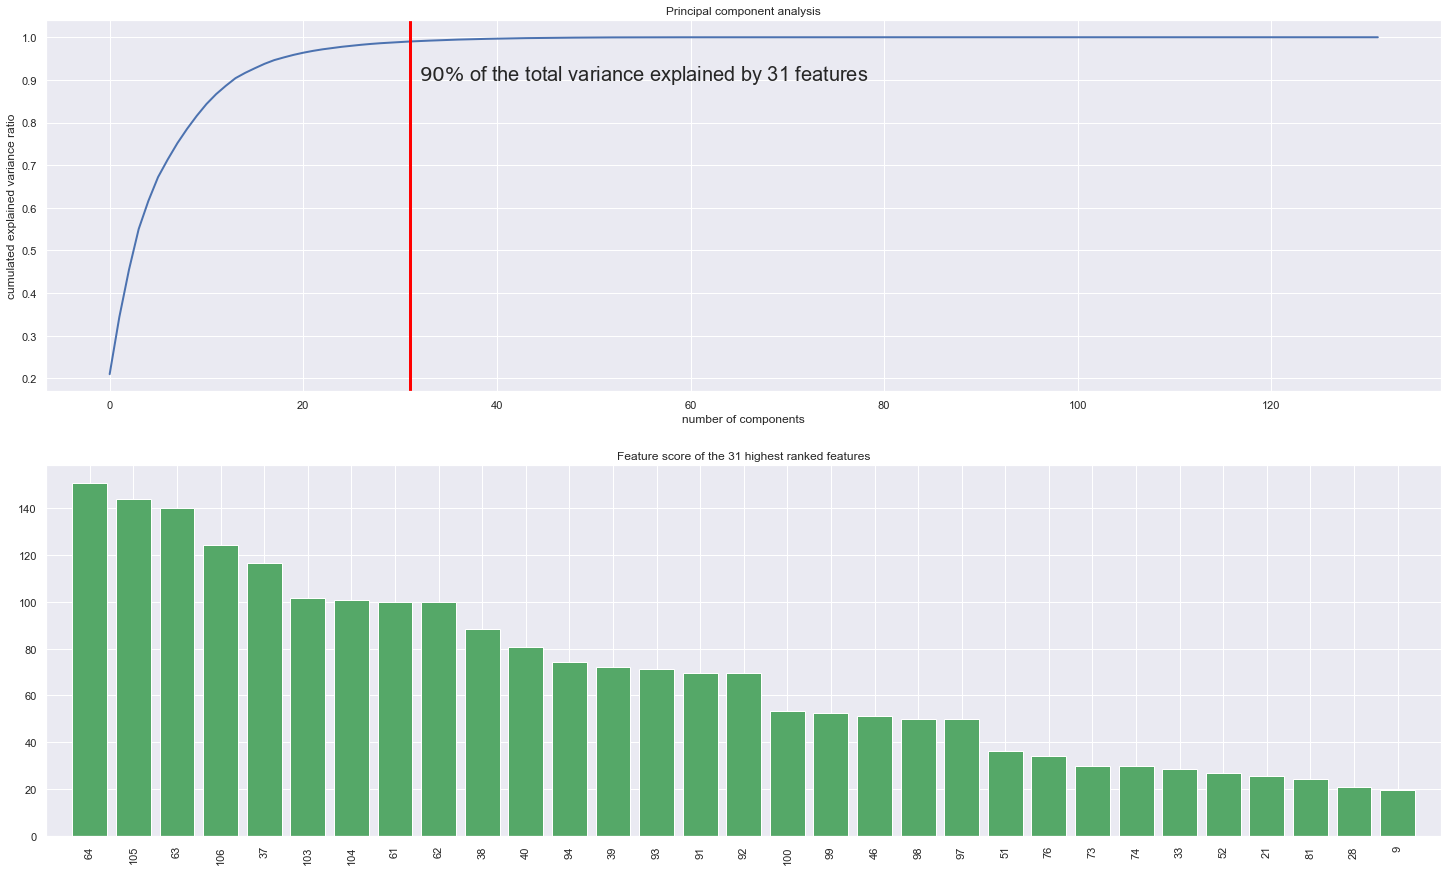

In [150]:
########################
### import libraries ###
########################

from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler

################################
### split train/test dataset ### 
################################

X = X_test
y = y_test.formation_energy_per_atom

scaler = StandardScaler()
scaler.fit(X)
x_train, y_train = scaler.transform(X), y

####################
### PCA analysis ###
####################

pca = PCA()
pca.fit(x_train)

####################
### plotting PCA ###
####################

plt.figure(figsize=(25, 15))
plt.subplot(2,1,1)
plt.plot(np.cumsum(pca.explained_variance_ratio_), linewidth=2)
index_99_pca = list(np.cumsum(pca.explained_variance_ratio_) > 0.99).index(True)
plt.axvline(x=index_99_pca, color='red', linewidth=3)
plt.text(index_99_pca + 1, 0.90, r'$90\%$ of the total variance explained by ' + str(index_99_pca) + ' features', fontsize=20)
plt.title('Principal component analysis')
plt.xlabel('number of components')
plt.ylabel('cumulated explained variance ratio')

###################
### SelectKBest ###
###################

select_feature = SelectKBest(f_regression, k=index_99_pca).fit(x_train, y_train) # change k according to PCA 

############################
### plotting SelectKBest ###
############################

importances = np.nan_to_num(select_feature.scores_)
indices = np.argsort(importances)[::-1]
plt.subplot(2,1,2)
plt.title("Feature score of the " + str(index_99_pca) + " highest ranked features") 
plt.bar(range(index_99_pca), importances[indices][:index_99_pca], color="g", align="center")
plt.xticks(range(index_99_pca), X.columns[indices][:index_99_pca], rotation=90)
plt.xlim([-1, index_99_pca])

plt.show()

In [151]:
indices

array([ 64, 105,  63, 106,  37, 103, 104,  61,  62,  38,  40,  94,  39,
        93,  91,  92, 100,  99,  46,  98,  97,  51,  76,  73,  74,  33,
        52,  21,  81,  28,   9,  31, 117,  34,  22,  82,  10,  35,  32,
        75,  15,   3,  19,  20,  17,   8,   7,  30,   0,  12,  18,  48,
        50, 118,  36,   5, 119,  45,  16,   4,  59,  77,  29,  53,  89,
        27, 107, 116, 115,  58,  83, 111, 123,  13, 102, 131, 124,  14,
         1,   2,  47, 108, 121, 122,  55,  56,  26,  25, 129,  42, 112,
       126, 128,  69,  11,  86,  85,  70,  23,  88, 109,  41,  57, 110,
        87,  43,  68,  67,  44, 130, 113, 120, 114, 127,   6, 125,  95,
       101,  96,  24,  54,  90,  84,  80,  79,  78,  72,  71,  66,  49,
        60,  65], dtype=int64)

In [16]:
#################
### load data ###
#################

df = pd.read_csv("data/train.csv")
df.head()

,formula,formation_energy_per_atom
0,Tb0.250000Er0.250000Np0.500000,0.863476
1,Zr0.250000Ag0.250000Re0.500000,0.670903
2,Mo0.250000Ba0.250000Th0.500000,0.701847
3,Sn0.250000Os0.250000Pa0.500000,0.057070
4,Li0.125000Fe0.125000Cu0.500000In0.250000,0.023933


In [17]:
#########################
### 1 atom = 1 column ###
#########################

elements = ['H', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Na', 'Mg', 'Al', 'Si', 'P', 'S', 'Cl', 'K', 'Ca', 'Sc', 'Ti', 'V', 
            'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Se', 'Br', 'Kr', 'Rb', 'Sr', 'Y', 'Zr', 'Nb', 
            'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'In', 'Sn', 'Sb', 'Te', 'I', 'Xe', 'Cs', 'Ba', 'La', 'Ce', 'Pr', 
            'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Hf', 'Ta', 'W', 'Re', 'Os', 'Ir', 
            'Pt', 'Au', 'Hg', 'Tl', 'Pb', 'Bi', 'Ac', 'Th', 'Pa', 'U', 'Np', 'Pu']

formulas = df.formula.values
temp = np.zeros(shape=(len(formulas), len(elements)), dtype=np.float32)
for i, formula in enumerate(formulas):
    comp = mg.Composition(formula).as_dict()
    for k in comp.keys():
        temp[i][elements.index(k)] = comp[k]
df[elements] = pd.DataFrame(temp, index=df.index)
df.head()

,formula,formation_energy_per_atom,H,Li,Be,B,C,N,O,F,...,Hg,Tl,Pb,Bi,Ac,Th,Pa,U,Np,Pu
0,Tb0.250000Er0.250000Np0.500000,0.863476,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0
1,Zr0.250000Ag0.250000Re0.500000,0.670903,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Mo0.250000Ba0.250000Th0.500000,0.701847,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0
3,Sn0.250000Os0.250000Pa0.500000,0.057070,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0
4,Li0.125000Fe0.125000Cu0.500000In0.250000,0.023933,0.0,0.125,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
from sklearn.preprocessing import StandardScaler

from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lars
from sklearn.linear_model import BayesianRidge
import lightgbm as lgb

from sklearn.model_selection import GridSearchCV
from tqdm import tqdm_notebook as tqdm
from sklearn.model_selection import train_test_split
import itertools as it
import operator
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

def tune_plot(model, param, X, y, normalize=1, iter_gridsearch=1, nb_cv=5, test_size=0.3, seed=141421):
    
    """
    Tune a given model with GridSearchCV and give for accuracy results with a confusion matrix.
    
    First you need to make sure that you imported the library for your model!
    
    model = classificator
    param = parameters of your classificator that you want to tune 
    X = data for prediction (DataFrame pref)
    y = target to predict (DataFrame pref)
    normalize = True/False (normalize both X and y with StandardScaler and LabelEncoder)
    iter_gridsearch = number of iteration for GridSearchCV (can be usefull if your model involve randomness)
    nb_cv = number of cross validation
    test_size = test size in percent (splitting train and test set)
    seed = seed for random state
    """
    
    print(" ************************* ", str(model), " ************************* ")
    
    ######################
    ### Normalize data ###
    ######################
    
    if normalize:
        yy = (y - np.mean(y)) / np.std(y)
        scaler = StandardScaler()
        scaler.fit(X)
        XX = scaler.transform(X)
    else:
        yy = y
        XX = X
    
    ####################
    ### GridSearchCV ###
    ####################
    
            #######################################################
            ### creat a dictionary of all possible combinations ###
            #######################################################

    allNames = sorted(param)
    dic_comb = {key: 0 for key in it.product(*(param[Name] for Name in allNames))}

            ####################################
            ### iteration throw GridSearchCV ###
            ####################################

    for i in tqdm(range(iter_gridsearch)):
        result_grid_search = GridSearchCV(estimator=model(), param_grid=param, cv=nb_cv, return_train_score=False)
        result_grid_search.fit(XX, yy)
        dic_comb[tuple(result_grid_search.best_params_[Name] for Name in allNames)] += 1

            ############################################
            ### selecting the best set of parameters ###
            ############################################

    best_param = {key : value for key, value in zip(allNames, max(dic_comb.items(), key=operator.itemgetter(1))[0])} 
    
    print('best parameters: ', best_param)
    
    ####################
    ### update model ###
    ####################
    
    clf = model(**best_param)
    
    ########################
    ### train / test set ###
    ########################
    
    x_train, x_test, y_train, y_test = train_test_split(XX, yy, test_size=test_size, random_state=seed)
    
    #################
    ### fit model ###
    #################    
    
    clf.fit(x_train, y_train)
    
    #############
    ### Score ###
    #############
    print('\n')
    
    print("Mean squared error (on test set): %.2f" % mean_absolute_error(y_test, clf.predict(x_test)))
    print('Variance score (max_value=1 for perfect prediction): %.2f' % r2_score(y_test, clf.predict(x_test)))
    
    #####################
    ### Average score ###
    #####################
    
    print('\n')
    mae = 0
    var = 0
    y_error = []
    n = 30
    for i in range(n):
        x_train, x_test, y_train, y_test = train_test_split(XX, yy, test_size=test_size, random_state=i)
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        y_error.append(list(y_test.values - y_pred))
        mae += mean_absolute_error(y_test, y_pred)
        var += r2_score(y_test, y_pred)
    print("Average Mean squared error: %.2f" %(mae / n))
    print('Average Variance score (max_value=1 for perfect prediction): %.2f' %(var / n))
    
    ##########################
    ### error distribution ###
    ##########################
    
    plt.figure(figsize=(15, 6))
    plt.title('Error distribution')
    sns.distplot(y_error[0])
    
    return best_param

In [19]:
atoms = {"Li", "O"}
is_test = np.array([atoms.issubset(comp) for comp in compositions]) # couple present in the dictionary
is_train = ~is_test
X = df[is_train].drop(['formula'], axis=1)
y = df[is_test].drop(['formula'], axis=1)

# Test of the MLPRegressor with GridSearhCV

 *************************  <class 'sklearn.neural_network.multilayer_perceptron.MLPRegressor'>  ************************* 



best parameters:  {'activation': 'logistic', 'alpha': 0.01, 'hidden_layer_sizes': (35,), 'solver': 'adam'}


Mean squared error (on test set): 0.15
Variance score (max_value=1 for perfect prediction): 0.95


Average Mean squared error: 0.15
Average Variance score (max_value=1 for perfect prediction): 0.95


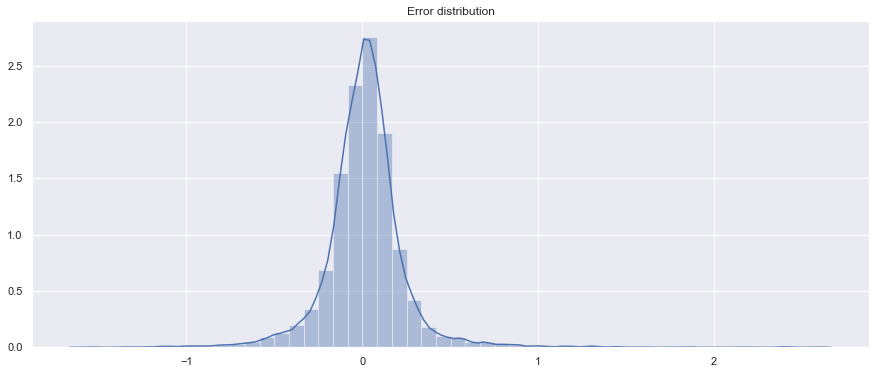

In [5]:
param = { 
    'hidden_layer_sizes' : [(20,), (25,), (30,), (35,)], # (100,) is default
    'activation' : ['relu', 'identity', 'logistic', 'tanh'], # 'relu' is default
    'solver' : ['adam'], # 'adam' is default
    'alpha' : [0.01, 0.001] # 0.0001 is default
    }

best_param_MLP = tune_plot(MLPRegressor, param,
                           df.drop(['formula', 'formation_energy_per_atom'], axis=1), df['formation_energy_per_atom'],
                           normalize=True, iter_gridsearch=1, nb_cv=3, test_size=0.2, seed=141421)

# Test of the LightGBM with GridSearhCV

In [161]:
X_train = X.drop('formation_energy_per_atom', axis=1)
y_train = X['formation_energy_per_atom']
X_test = y.drop('formation_energy_per_atom', axis=1)
y_test = y['formation_energy_per_atom']

# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

# specify your configurations as a dict
params = {
    'boosting_type': {'gbdt'},
    'objective': 'regression',
    'metric': {'mae'},
    'num_leaves': 23,
    'min_data_in_leaf': 200,
    'learning_rate': 0.1,
}

print('Starting training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=1000,
                valid_sets=lgb_eval,
early_stopping_rounds=5)

print('Saving model...')
# save model to file
gbm.save_model('model.txt')

print('Starting predicting...')
# predict
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
# eval
print('The mae of prediction is:', mean_absolute_error(y_test, y_pred))

Starting training...
[1]	valid_0's l1: 1.94756
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 1.75755
[3]	valid_0's l1: 1.5979
[4]	valid_0's l1: 1.4478
[5]	valid_0's l1: 1.31824
[6]	valid_0's l1: 1.20672
[7]	valid_0's l1: 1.09968
[8]	valid_0's l1: 1.00902
[9]	valid_0's l1: 0.925651
[10]	valid_0's l1: 0.851926
[11]	valid_0's l1: 0.791979
[12]	valid_0's l1: 0.738466
[13]	valid_0's l1: 0.690409
[14]	valid_0's l1: 0.649467
[15]	valid_0's l1: 0.619478
[16]	valid_0's l1: 0.591289
[17]	valid_0's l1: 0.568179
[18]	valid_0's l1: 0.547452
[19]	valid_0's l1: 0.532622
[20]	valid_0's l1: 0.517716
[21]	valid_0's l1: 0.506023
[22]	valid_0's l1: 0.500004
[23]	valid_0's l1: 0.490397
[24]	valid_0's l1: 0.488444
[25]	valid_0's l1: 0.481088
[26]	valid_0's l1: 0.478446
[27]	valid_0's l1: 0.477575
[28]	valid_0's l1: 0.47306
[29]	valid_0's l1: 0.469024
[30]	valid_0's l1: 0.465374
[31]	valid_0's l1: 0.462701
[32]	valid_0's l1: 0.459928
[33]	valid_0's l1: 0.45888
[34]	valid_0's 

In [20]:
param = { 
    'num_leaves' : [10, 15, 20, 25], # rbf is default
    'min_data_in_leaf' : [100, 500, 1000]
    }

best_param_MLP = tune_plot(lgb, param,
                           df.drop(['formula', 'formation_energy_per_atom'], axis=1), df['formation_energy_per_atom'],
                           normalize=True, iter_gridsearch=10, nb_cv=3, test_size=0.2, seed=141421)

 *************************  <module 'lightgbm' from 'C:\\Users\\Louis\\Anaconda3\\lib\\site-packages\\lightgbm\\__init__.py'>  ************************* 


TypeError: 'module' object is not callable

# Test of the XGBoost with GridSearhCV

In [21]:
param = { 
    'max_depth ' : [10, 15, 20, 25, 30], # rbf is default
    'learning_rate' : [0.001, 0.1], # auto is default
    'n_estimators': [25, 50, 75, 100],
    'booster': ['gbtree', 'gblinear', 'dart']
    }

best_param_MLP = tune_plot(xgboost.XGBRegressor, param,
                          df.drop(['formula', 'formation_energy_per_atom'], axis=1), df['formation_energy_per_atom'],
                           normalize=True,
                          iter_gridsearch=1, nb_cv=3, test_size=0.2, seed=141421)

 *************************  <class 'xgboost.sklearn.XGBRegressor'>  ************************* 



best parameters:  {'booster': 'dart', 'learning_rate': 0.1, 'max_depth ': 10, 'n_estimators': 100}


Mean squared error (on test set): 0.41
Variance score (max_value=1 for perfect prediction): 0.71




KeyboardInterrupt: 

# Test of the Ridge with GridSearhCV

 *************************  <class 'sklearn.linear_model.ridge.Ridge'>  ************************* 



best parameters:  {'alpha': 0}


Mean squared error (on test set): 0.39
Variance score (max_value=1 for perfect prediction): 0.71


Average Mean squared error: 0.39
Average Variance score (max_value=1 for perfect prediction): 0.72


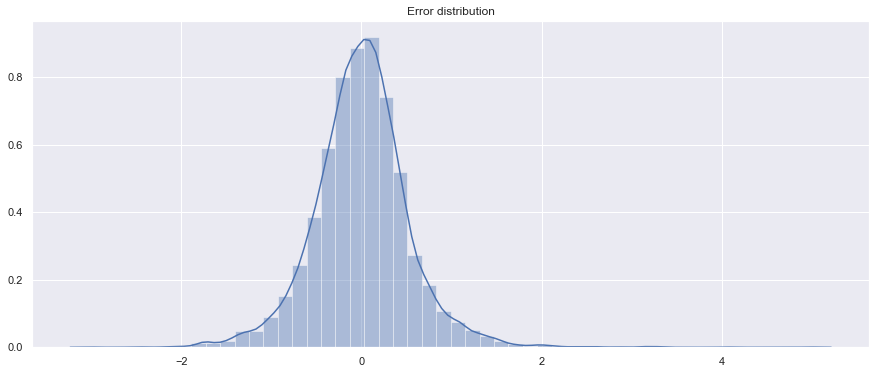

In [8]:
param = { 
    'alpha' : [0, 0.1, 0.01], # rbf is default
    }

best_param_MLP = tune_plot(Ridge, param,
                           df.drop(['formula', 'formation_energy_per_atom'], axis=1), df['formation_energy_per_atom'],
                           normalize=True, iter_gridsearch=1, nb_cv=3, test_size=0.2, seed=141421)

# Test of the LinearRegression with GridSearhCV

 *************************  <class 'sklearn.linear_model.base.LinearRegression'>  ************************* 



best parameters:  {'fit_intercept': False}


Mean squared error (on test set): 0.39
Variance score (max_value=1 for perfect prediction): 0.71


Average Mean squared error: 0.39
Average Variance score (max_value=1 for perfect prediction): 0.72


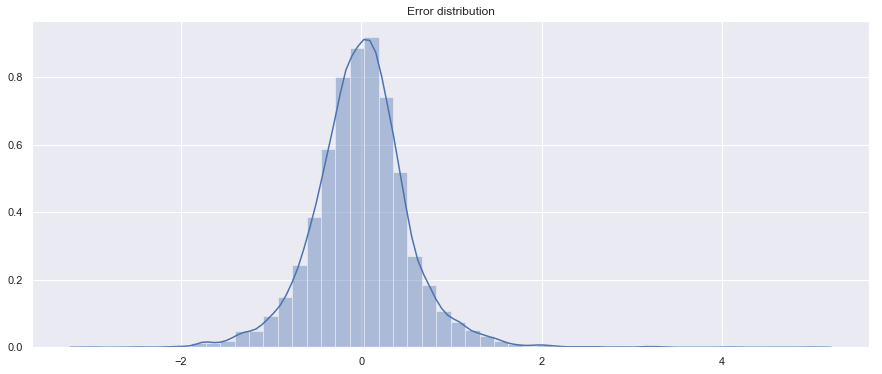

In [162]:
param = { 
    'fit_intercept' : [True, False], # rbf is default
    }

best_param_MLP = tune_plot(LinearRegression, param,
                           df.drop(['formula', 'formation_energy_per_atom'], axis=1), df['formation_energy_per_atom'],
                           normalize=True, iter_gridsearch=1, nb_cv=3, test_size=0.2, seed=141421)

# Test of the GradientBoostingRegressor with GridSearhCV

In [20]:
param = { 
    'loss' : ['ls', 'lad', 'huber', 'quantile'], # 1e-10 is default
    }

best_param_MLP = tune_plot(GradientBoostingRegressor, param,
                           df.drop(['formula', 'formation_energy_per_atom'], axis=1), df['formation_energy_per_atom'],
                           normalize=True, iter_gridsearch=1, nb_cv=3, test_size=0.2, seed=141421)

 *************************  <class 'sklearn.ensemble.gradient_boosting.GradientBoostingRegressor'>  ************************* 


KeyboardInterrupt: 

# Test of the RandomForestRegressor with GridSearhCV

 *************************  <class 'sklearn.ensemble.forest.RandomForestRegressor'>  ************************* 



best parameters:  {'max_depth': 10, 'n_estimators': 15}


Mean squared error (on test set): 0.44
Variance score (max_value=1 for perfect prediction): 0.66


Average Mean squared error: 0.44
Average Variance score (max_value=1 for perfect prediction): 0.67


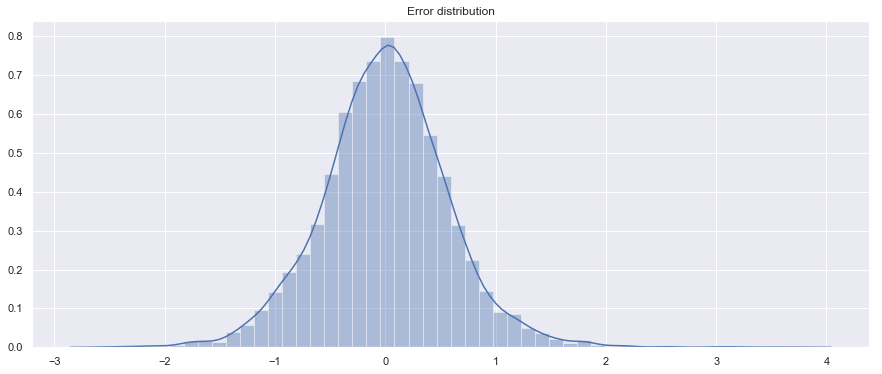

In [7]:
param = { 
    'n_estimators' : [5, 10, 15, 20], # 1e-10 is default
    'max_depth' : [3, 5, 7, 8, 10], # 2 is default
    }

best_param_MLP = tune_plot(RandomForestRegressor, param,
                           df.drop(['formula', 'formation_energy_per_atom'], axis=1), df['formation_energy_per_atom'],
                           normalize=True, iter_gridsearch=1, nb_cv=3, test_size=0.2, seed=141421)